# 순환신경망 주식예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

## 1. 데이터 준비

In [2]:
!pip install yfinance

In [4]:
import yfinance as yf

tsla = yf.Ticker('TSLA')
df = tsla.history(period='max')
df.shape

(3653, 7)

## 3. 데이터 정보

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2010-06-29 00:00:00-04:00 to 2025-01-02 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3653 non-null   float64
 1   High          3653 non-null   float64
 2   Low           3653 non-null   float64
 3   Close         3653 non-null   float64
 4   Volume        3653 non-null   int64  
 5   Dividends     3653 non-null   float64
 6   Stock Splits  3653 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 228.3 KB


In [6]:
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


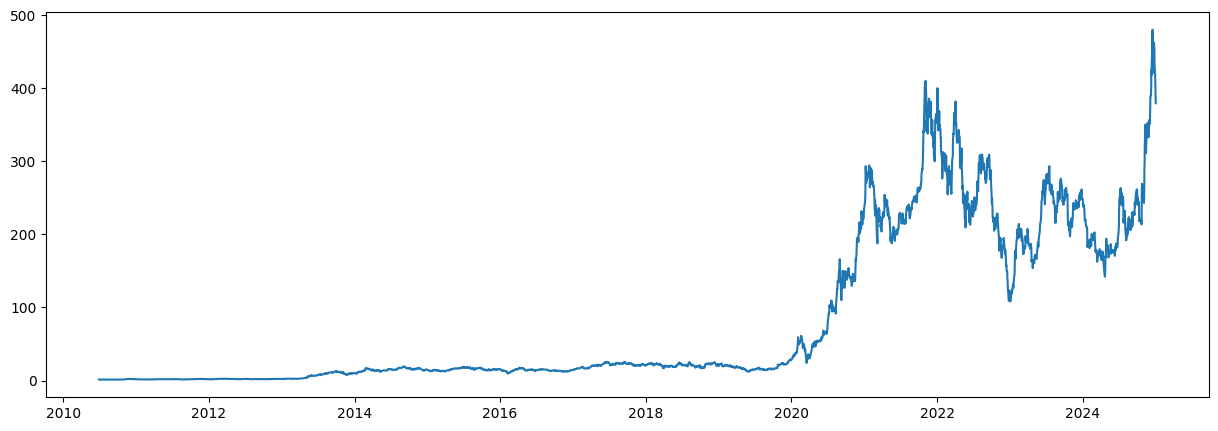

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.show()

In [8]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### 피처 추가

In [11]:
# 3일 평균

df['ma3'] = np.around(df['Close'].rolling(window=3).mean(),0)

In [12]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ma3
Date,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0,NaN
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0,NaN
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0,2.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0,1.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,1.0


In [17]:
# 5일 평균

df['ma5'] = np.around(df['Close'].rolling(window=5).mean(),0)
df['ma20'] = np.around(df['Close'].rolling(window=20).mean(),0)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ma3,ma5,ma20
Date,,,,,,,,,,
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,1.0,NaN,NaN
2010-07-07 00:00:00-04:00,1.093333,1.108667,0.998667,1.053333,103825500,0.0,0.0,1.0,NaN,NaN
2010-07-08 00:00:00-04:00,1.076000,1.168000,1.038000,1.164000,115671000,0.0,0.0,1.0,NaN,NaN
2010-07-09 00:00:00-04:00,1.172000,1.193333,1.103333,1.160000,60759000,0.0,0.0,1.0,NaN,NaN
2010-07-12 00:00:00-04:00,1.196667,1.204667,1.133333,1.136667,33037500,0.0,0.0,1.0,1.0,NaN


In [18]:
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
ma3,0
ma5,4
ma20,19


In [19]:
# 결측치 삭제

df = df.dropna()

In [20]:
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
ma3,0
ma5,0
ma20,0


## 4. 데이터 분리

In [21]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'ma3', 'ma5', 'ma20'],
      dtype='object')

In [22]:
x = df.drop(['Close', 'Volume', 'Dividends', 'Stock Splits'], axis = 1)
x.head()

,Open,High,Low,ma3,ma5,ma20
Date,,,,,,
2010-08-02 00:00:00-04:00,1.366667,1.398000,1.355333,1.0,1.0,1.0
2010-08-03 00:00:00-04:00,1.400000,1.463333,1.388000,1.0,1.0,1.0
2010-08-04 00:00:00-04:00,1.463333,1.478667,1.390000,1.0,1.0,1.0
2010-08-05 00:00:00-04:00,1.436000,1.436667,1.336667,1.0,1.0,1.0
2010-08-06 00:00:00-04:00,1.340000,1.344000,1.301333,1.0,1.0,1.0


In [23]:
y = df['Close']
y.head()

,Close
Date,
2010-08-02 00:00:00-04:00,1.394667
2010-08-03 00:00:00-04:00,1.463333
2010-08-04 00:00:00-04:00,1.417333
2010-08-05 00:00:00-04:00,1.363333
2010-08-06 00:00:00-04:00,1.306000


In [28]:
def make_sequence_dataset(x, y, window_size = 20):
  feature_list = []
  label_list = []

  for i in range(len(x) - window_size):
    feature = x[i:i + window_size]
    label = y[i+window_size]

    feature_list.append(np.array(feature))
    label_list.append(np.array(label))

  return np.array(feature_list), np.array(label_list)

In [30]:
x_w, y_w = make_sequence_dataset(x, y, 20)
x_w.shape, y_w.shape

<ipython-input-28-8480a2bfdfb5>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = y[i+window_size]


((3610, 20, 6), (3610,))

In [31]:
 from sklearn.model_selection import train_test_split
 x_train, x_test, y_train, y_test = train_test_split(x_w, y_w, test_size=0.2, shuffle=False)
 x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2888, 20, 6), (722, 20, 6), (2888,), (722,))

## 5. 모델 만들기

In [32]:
x_train.shape

(2888, 20, 6)

In [34]:
from keras import layers

model = keras.Sequential()
model.add(layers.Input(shape=(20,6)))
model.add(layers.LSTM(units=50, activation='relu'))
model.add(layers.Dense(units=1))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,451 (44.73 KB)

 Trainable params: 11,451 (44.73 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [38]:
EPOCHS = 100
BATCHSIZE = 32

history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE, validation_split=0.2)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3507 - mse: 0.3507 - val_loss: 4801.7358 - val_mse: 4801.7358
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3277 - mse: 0.3277 - val_loss: 4251.4531 - val_mse: 4251.4531
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.3034 - mse: 0.3034 - val_loss: 3374.2266 - val_mse: 3374.2266
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2775 - mse: 0.2775 - val_loss: 5242.0640 - val_mse: 5242.0640
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2568 - mse: 0.2568 - val_loss: 2433.4260 - val_mse: 2433.4260
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2610 - mse: 0.2610 - val_loss: 2454.4875 - val_mse: 2454.4875
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2750 - mse: 0.2750 - val_loss: 2667.3367 - val_mse: 2667.3367
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2740 - mse: 0.2740 - val_loss: 2083.3542 - val_mse: 2083.3542
Epoch 9/

In [39]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['mse'], label='train_mse')
    plt.plot(hist['epoch'], hist['val_mse'], label='val_mse')
    plt.title('MSE Curve')
    plt.legend()

    plt.show()

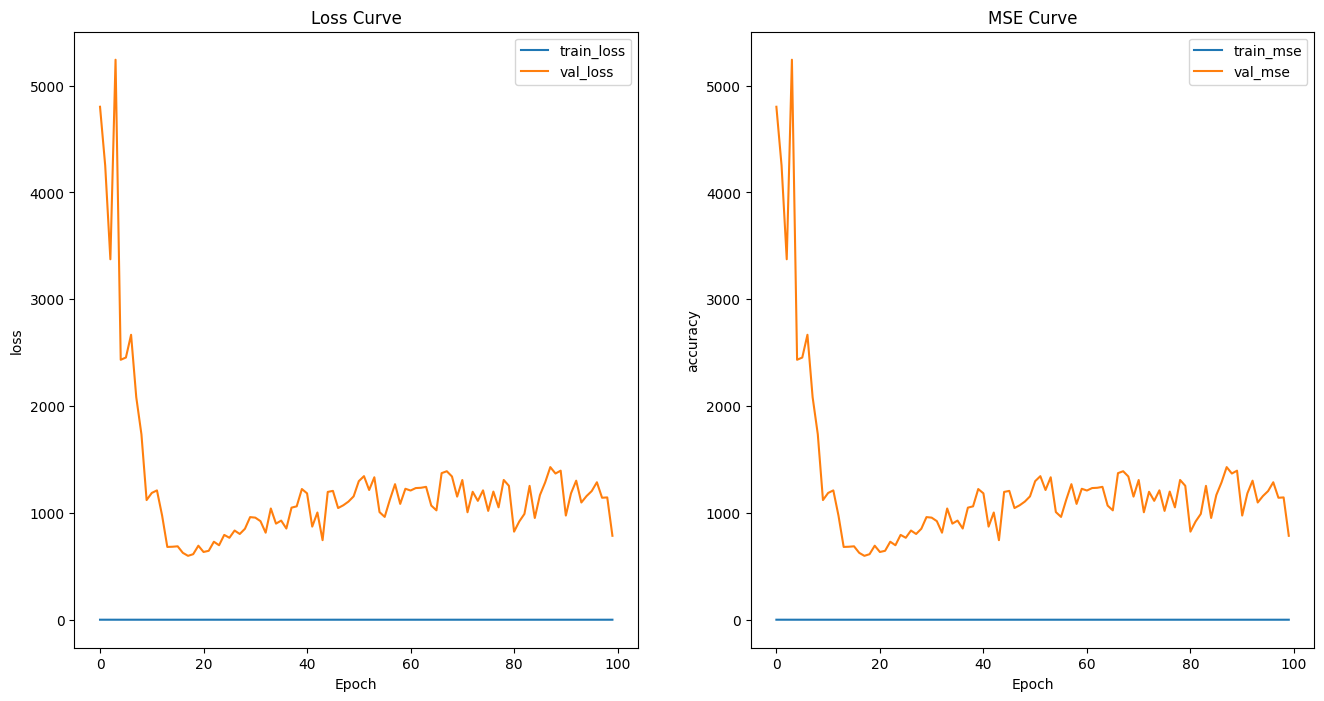

In [40]:
plot_history(history)

## 테스트

In [41]:
y_pred = model.predict(x_test)
y_pred

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


array([[269.79996 ],
       [265.87274 ],
       [267.926   ],
       [260.19107 ],
       [267.84726 ],
       [250.48383 ],
       [261.0522  ],
       [262.95172 ],
       [260.73016 ],
       [246.69817 ],
       [243.6206  ],
       [253.13837 ],
       [255.51093 ],
       [235.73315 ],
       [235.94199 ],
       [248.06761 ],
       [247.79398 ],
       [229.46204 ],
       [243.29834 ],
       [348.02707 ],
       [254.59912 ],
       [350.32758 ],
       [352.74158 ],
       [362.18585 ],
       [358.87848 ],
       [362.81818 ],
       [362.84387 ],
       [377.67334 ],
       [365.25992 ],
       [382.75375 ],
       [383.02094 ],
       [384.92474 ],
       [395.78345 ],
       [399.38342 ],
       [291.13483 ],
       [260.30432 ],
       [263.08746 ],
       [361.6814  ],
       [327.87933 ],
       [273.97058 ],
       [264.9191  ],
       [260.6736  ],
       [271.2154  ],
       [270.92627 ],
       [279.0831  ],
       [267.81012 ],
       [279.00156 ],
       [273.5

In [42]:
y_test

array([292.1166687 , 285.66000366, 273.84332275, 254.67999268,
       266.92333984, 269.95666504, 290.14334106, 288.12332153,
       293.29666138, 279.76333618, 279.42999268, 268.19332886,
       274.79998779, 286.32333374, 279.43331909, 265.1166687 ,
       255.45666504, 267.29666138, 280.07666016, 290.5333252 ,
       301.79666138, 307.05334473, 331.32666016, 333.03668213,
       337.97332764, 336.88000488, 363.94665527, 366.52334595,
       364.66333008, 359.20001221, 361.52999878, 381.81668091,
       363.75332642, 348.58666992, 352.42001343, 341.82998657,
       325.30999756, 328.9833374 , 340.79000854, 328.33334351,
       334.76333618, 342.7166748 , 325.7333374 , 336.26000977,
       335.0166626 , 332.67333984, 292.14001465, 293.83666992,
       292.50332642, 290.25332642, 300.98001099, 303.08334351,
       317.54000854, 291.09332275, 288.54998779, 262.36999512,
       266.67999268, 244.66667175, 242.66667175, 256.52999878,
       241.45666504, 253.86999512, 236.60333252, 236.47

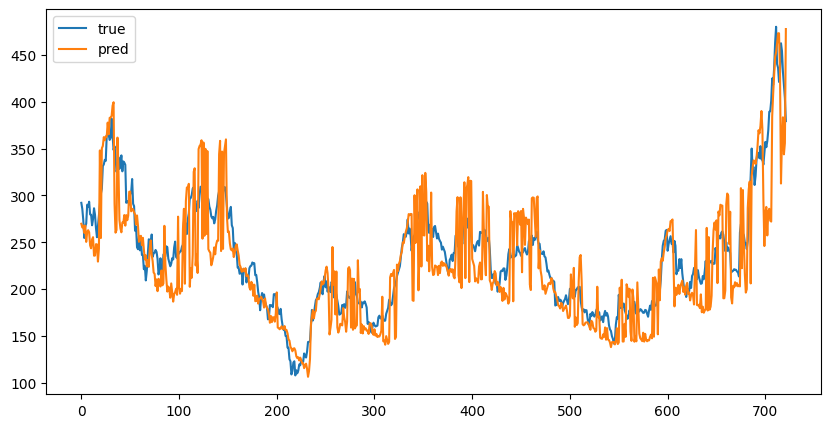

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='true')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()